In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
zep = pd.read_csv("C:/Users/Ishan Das/OneDrive/Desktop/ZOPTAP ASSISMENT/Customers.csv")

In [3]:
zep.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
zep.shape

(200, 4)

In [8]:
zep.isnull()

,CustomerID,CustomerName,Region,SignupDate
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [9]:
zep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
zep.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [21]:
zep['Region']isnull().sum()

SyntaxError: invalid syntax (3424123435.py, line 1)

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

<Axes: xlabel='Region'>

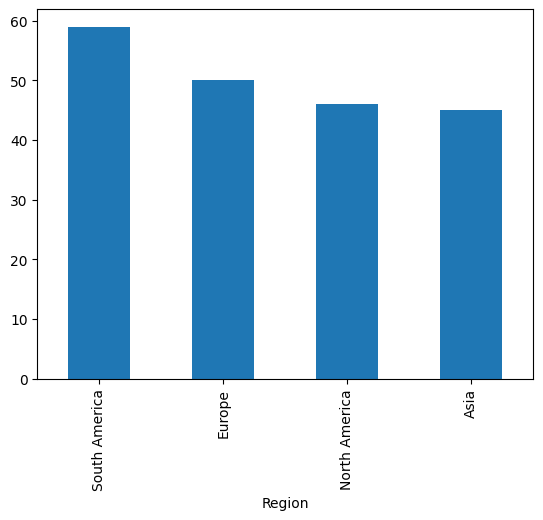

In [18]:
zep['Region'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

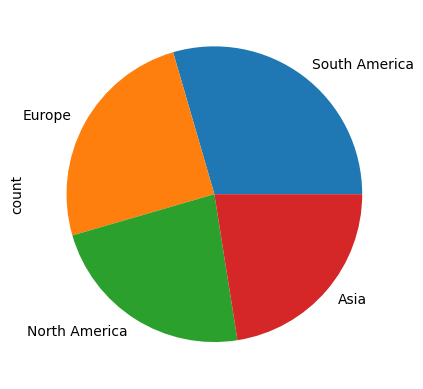

In [22]:
zep['Region'].value_counts().plot(kind='pie')

In [26]:
zep['SignupDate'] = pd.to_datetime(zep['SignupDate'])

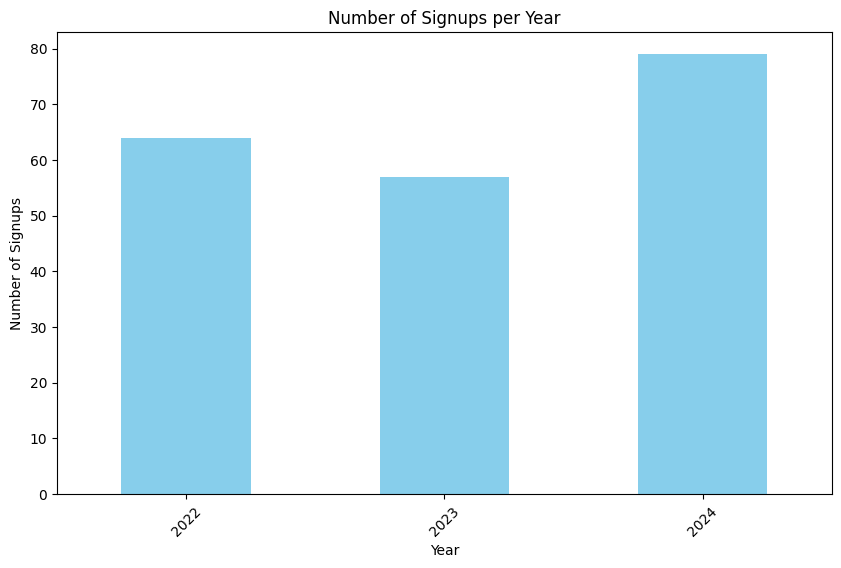

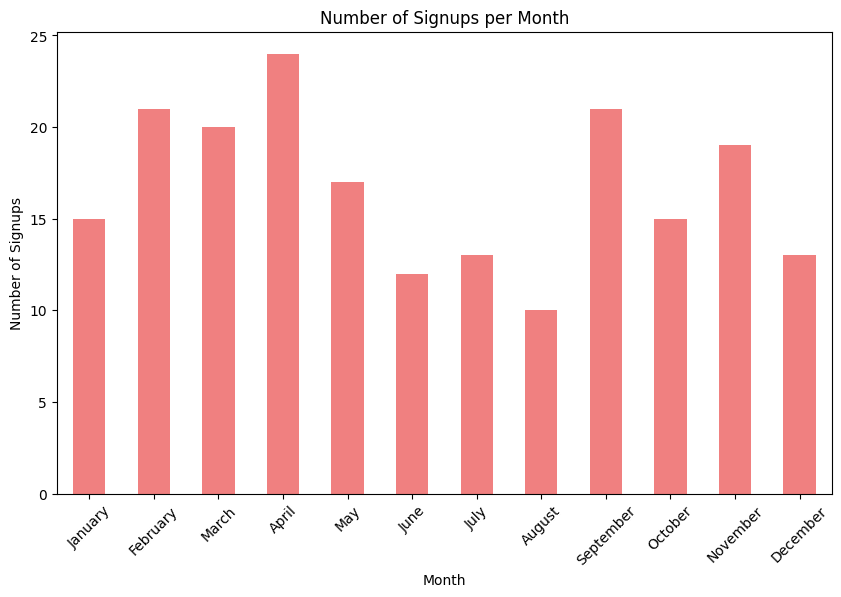

In [28]:
# Extract year and month from SignupDate
zep['SignupYear'] = zep['SignupDate'].dt.year
zep['SignupMonth'] = zep['SignupDate'].dt.month_name()

# Plot the number of signups per year
signup_years = zep['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(10,6))
signup_years.plot(kind='bar', color='skyblue')
plt.title('Number of Signups per Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()



# Plot the number of signups per month
signup_months = zep['SignupMonth'].value_counts().sort_index()
plt.figure(figsize=(10,6))
signup_months = signup_months.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
signup_months.plot(kind='bar', color='lightcoral')
plt.title('Number of Signups per Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()



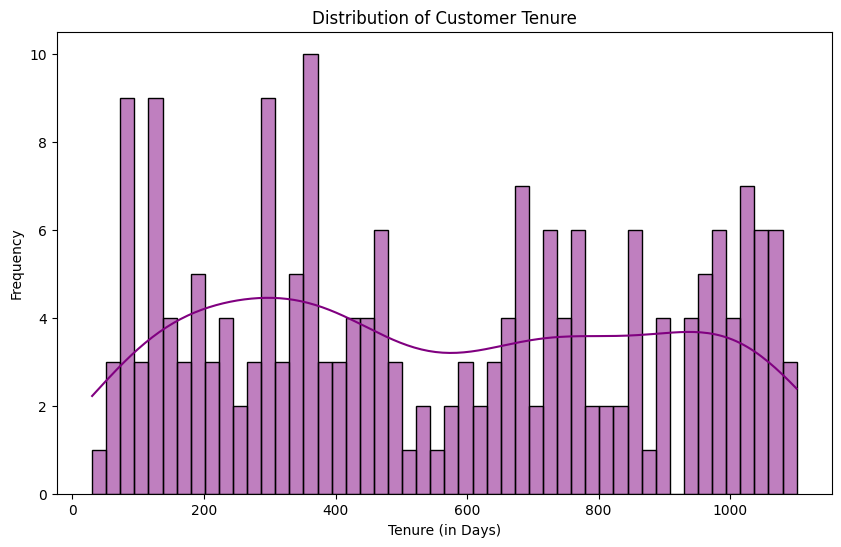

In [31]:
# Calculate customer tenure (days since signup)
zep['Tenure'] = (pd.to_datetime('today') - zep['SignupDate']).dt.days

# Plot distribution of customer tenure
plt.figure(figsize=(10,6))
sn.histplot(zep['Tenure'], bins=50, kde=True, color='purple')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (in Days)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

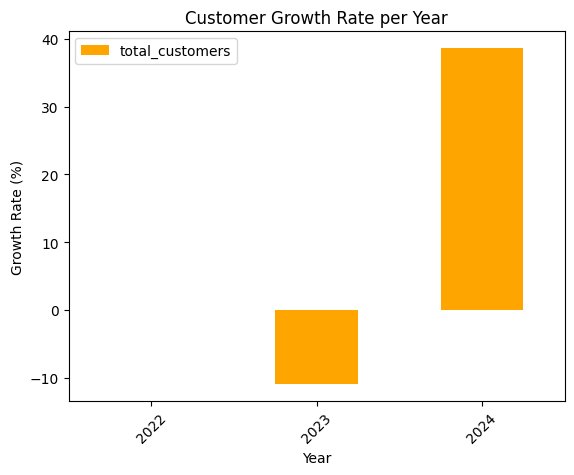

In [32]:
# Calculate the growth rate of customers per year
customer_growth_rate = zep.groupby('SignupYear').agg(
    total_customers=('CustomerID', 'nunique')
).pct_change() * 100

# Plot the customer growth rate
plt.figure(figsize=(10,6))
customer_growth_rate.plot(kind='bar', color='orange')
plt.title('Customer Growth Rate per Year')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()
